<a href="https://colab.research.google.com/github/ram130849/annual_income_classification_using_Xg_boost_LightBGM/blob/main/Adult_Income_Classification_Using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!unzip adult.csv.zip -d "/content/"

Archive:  adult.csv.zip
  inflating: /content/adult.csv      


In [5]:
df = pd.read_csv('/content/adult.csv')
print(df.head(10))

   age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0                  ?   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [ ]:
df.drop(['fnlwgt','capital.gain','capital.loss'],axis=1,inplace=True)

In [20]:
print(sorted(df['marital.status'].unique()))

['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']


In [18]:
print(sorted(df['age'].unique()))

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90]


In [19]:
print(sorted(df['workclass'].unique()))

['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']


In [21]:
print(sorted(df['education'].unique()))

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']


In [23]:
print(sorted(df['income'].unique()))

['<=50K', '>50K']


In [24]:
print(sorted(df['race'].unique()))

['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']


In [25]:
print(sorted(df['native.country'].unique()))

['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']


In [26]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [22]:
df.shape

(32561, 15)

In [27]:
#cleaning string in object columns
for i in df.columns:
    if(df[i].dtype=='object'):
        df[i] = df[i].str.strip()

In [34]:
df['income'] = df['income'].replace('>50K',1)
df['income'] = df['income'].replace('<=50K',0)

In [40]:
print(df['income'].unique())

[0 1]


In [39]:
print(df[df['income']==0].shape)
print(df[df['income']==1].shape)

(24720, 15)
(7841, 15)


In [41]:
# Getting the index of '?' in rows and remove those rows.
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
print('length of rows:',len(l))
df.drop(index=l,inplace=True)

length of rows: 4262


In [45]:
#no null value in dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [47]:
#doing private job and salary more than 50K
new_df = df[df['workclass']=='Private']
print(len(new_df[new_df['income']==1]))
new_df[new_df['income']==1].head(2)

4876


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,1


In [48]:
new_df[new_df['income']==0].head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


sex     Female   Male
income               
0         8670  13984
1         1112   6396


<AxesSubplot:xlabel='income'>

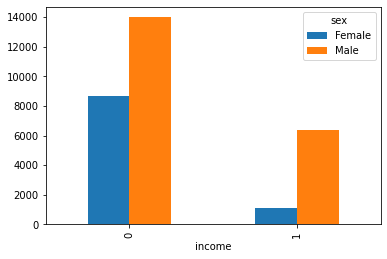

In [50]:
#cheacking male and female ratio according to their salary
class_sex = pd.crosstab(df['income'],df['sex'])
print(class_sex)
class_sex.plot(kind='bar')

income                  0     1
race                           
Amer-Indian-Eskimo    252    34
Asian-Pac-Islander    647   248
Black                2451   366
Other                 210    21
White               19094  6839


<AxesSubplot:xlabel='race'>

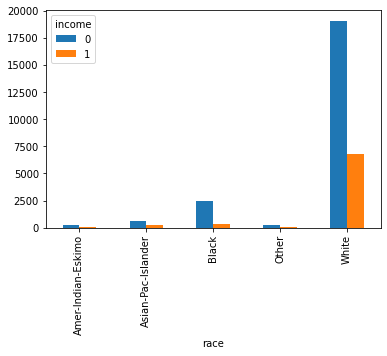

In [51]:
class_race = pd.crosstab(df['race'],df['income'])
print(class_race)
class_race.plot(kind='bar')

In [52]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [56]:
#how many of people whose age above 40 earn more than 50K
avg_age = df[df['age']>40]
print(len(avg_age[avg_age['income']==1]))
avg_age[avg_age['income']==1].head(2)

4510


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1


In [57]:
#how many of people whose age above average earn less than 50K
print(len(avg_age[avg_age['income']==0]))
avg_age[avg_age['income']==0].head(2)

7892


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


<AxesSubplot:xlabel='income'>

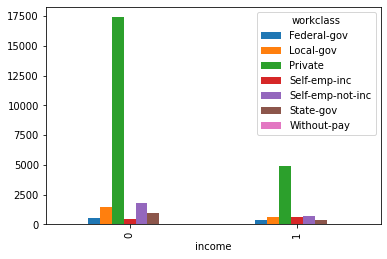

In [59]:
#cheacking distribution of people in working class according to salary
class_salary = pd.crosstab(df['income'],df['workclass'])
class_salary.plot(kind='bar')

<AxesSubplot:xlabel='education'>

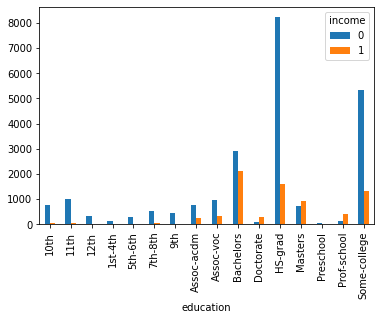

In [60]:
#checking distribution of people according to education
salary_education = pd.crosstab(df['education'],df['income'])
salary_education.plot(kind='bar')

In [62]:
# numerical columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

num_col 

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'income']

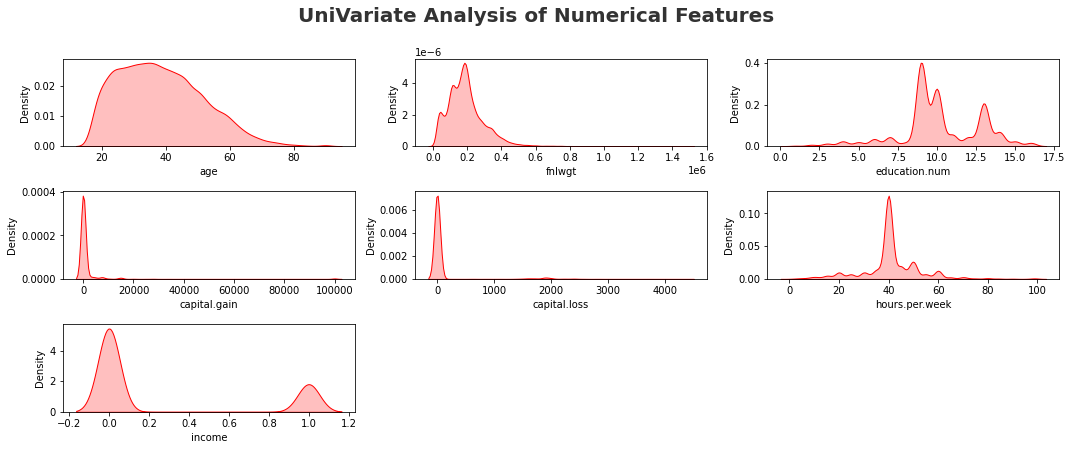

In [70]:
plt.figure(figsize=(15,15))
plt.suptitle('UniVariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)
for i in range(0, len(num_col)):
    plt.subplot(8, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='r')
    plt.xlabel(num_col[i])
    plt.tight_layout()
plt.show()

In [69]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
cat_col 

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

<Figure size 432x288 with 0 Axes>

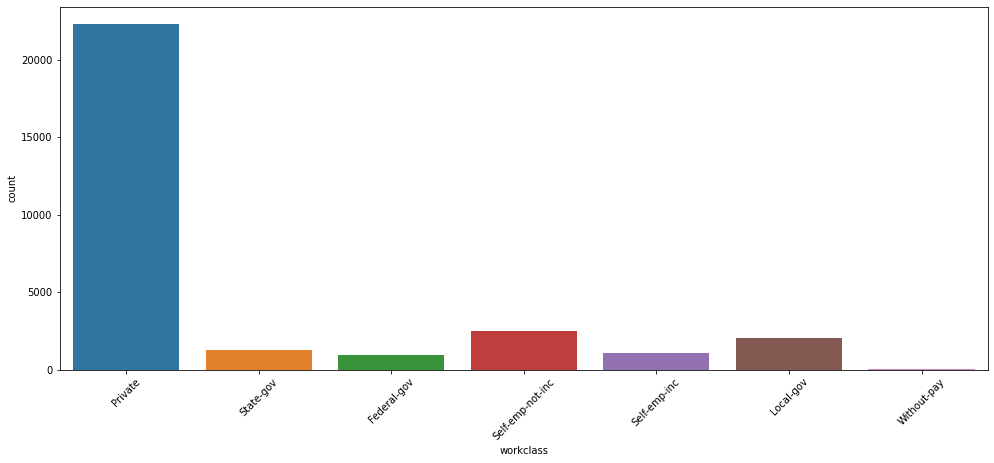

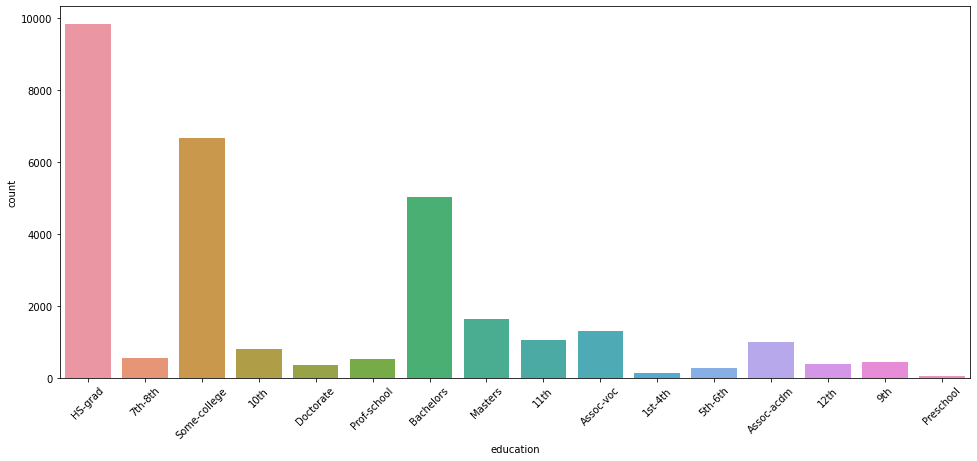

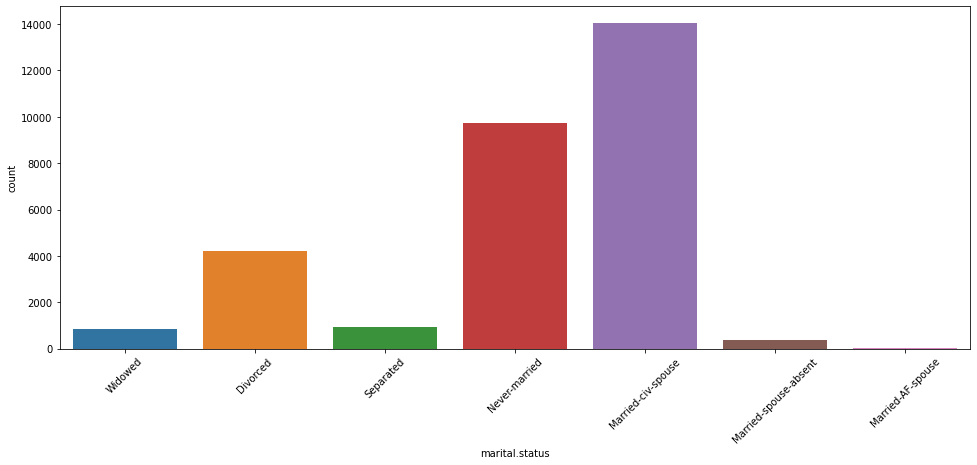

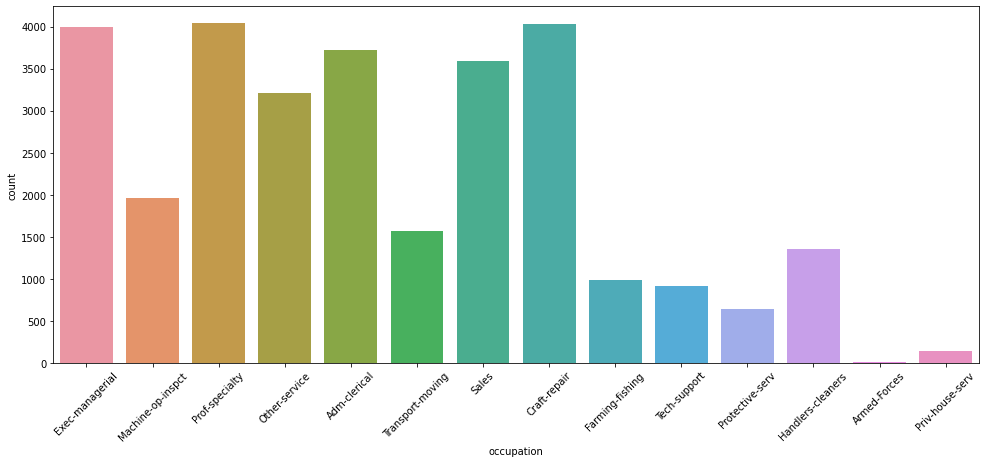

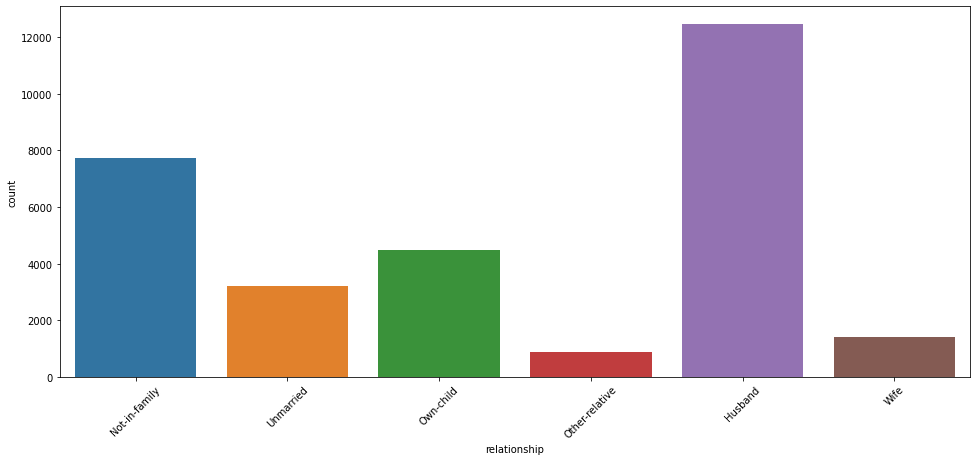

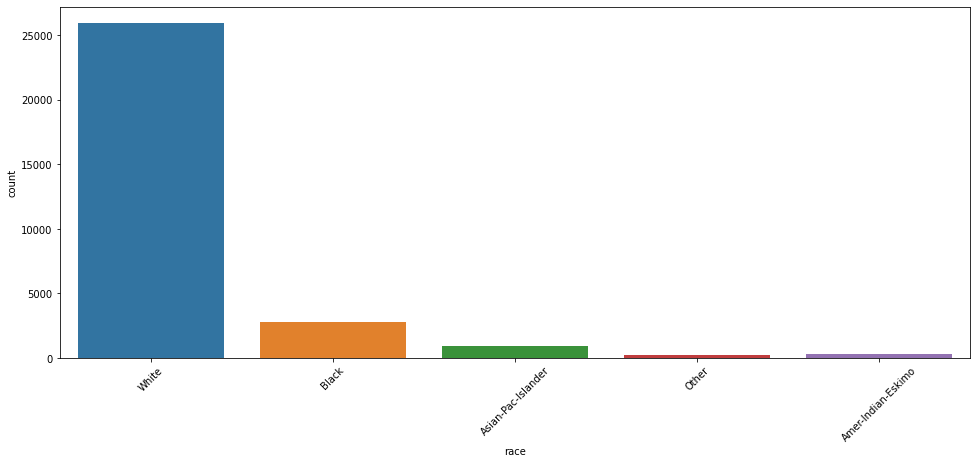

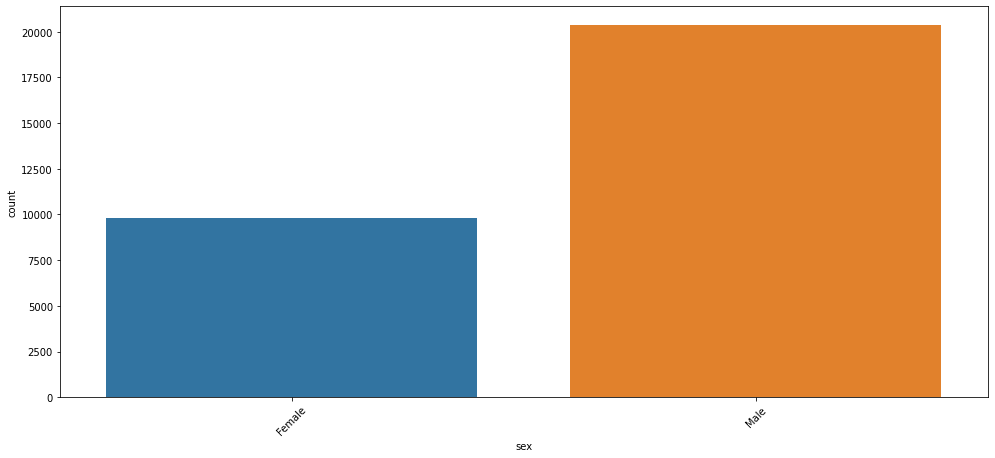

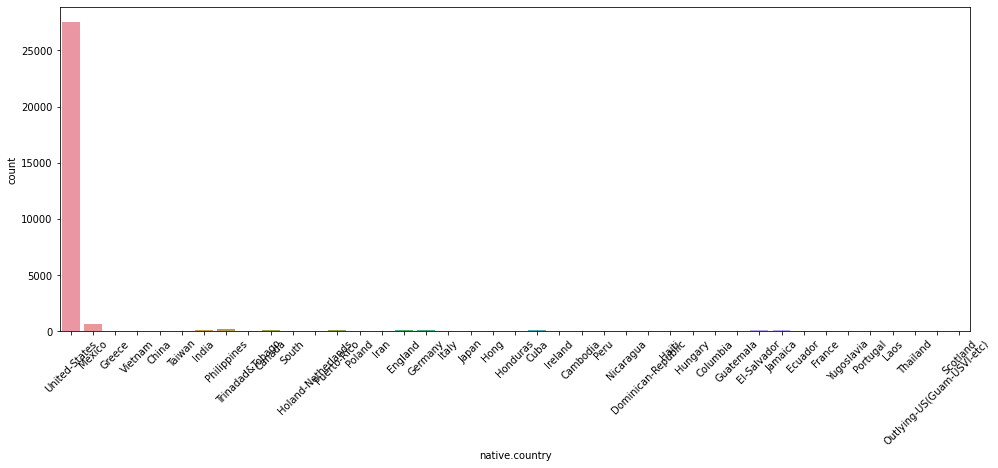

In [72]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

In [78]:
df[list(df.columns)[1:]].corr()

,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
fnlwgt,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.008957
education.num,-0.044992,1.000000,0.124416,0.079646,0.152522,0.335286
capital.gain,0.000422,0.124416,1.000000,-0.032229,0.080432,0.221196
capital.loss,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.150053
hours.per.week,-0.022886,0.152522,0.080432,0.052417,1.000000,0.229480
income,-0.008957,0.335286,0.221196,0.150053,0.229480,1.000000


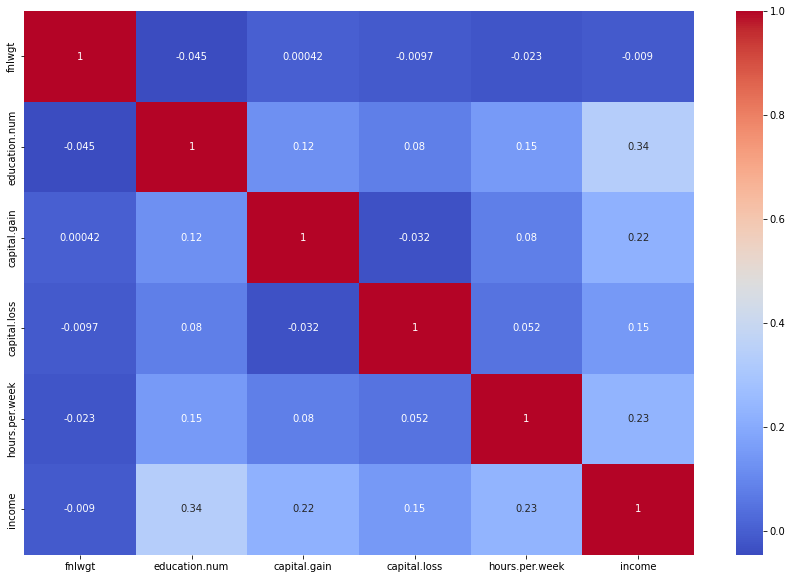

In [79]:
# Correlation between the features.
plt.figure(figsize = (15,10))
sns.heatmap(df[list(df.columns)[1:]].corr(), cmap="coolwarm", annot=True)
plt.show()

In [ ]:
# Check Multicollinearity for Categorical features.
